In [1]:
%load_ext autoreload
%autoreload 2

In [389]:
#2. specify parameters
pipeline_params={
}
step_params={
}
substep_params={
    "FILTER_EMPTY_GT"    : False,
    "MIN_OBJECT_SIZE"    : 5
}

In [3]:
#3 define substep interface
from sinara.substep import NotebookSubstep, default_param_values, ENV_NAME, PIPELINE_NAME, ZONE_NAME, STEP_NAME, RUN_ID, ENTITY_NAME, ENTITY_PATH, SUBSTEP_NAME

substep = NotebookSubstep(pipeline_params, step_params, substep_params, **default_param_values("params/step_params.json"))

substep.interface(
    outputs = 
    [
        { ENTITY_NAME: "train_coco_data"},
        { ENTITY_NAME: "eval_coco_data"},
        { ENTITY_NAME: "cache_config"}
    ],
    tmp_outputs =
    [
        { ENTITY_NAME: "cache_data" }
    ]
)

substep.print_interface_info()

substep.exit_in_visualize_mode()

**OUTPUTS:**


[{'user.yolox_mmdet.zone.1_data_import.train_coco_data': '/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/train_coco_data'},
 {'user.yolox_mmdet.zone.1_data_import.eval_coco_data': '/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/eval_coco_data'},
 {'user.yolox_mmdet.zone.1_data_import.cache_config': '/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/cache_config'}]




**TMP OUTPUTS:**


[{'cache:user.yolox_mmdet.zone.1_data_import.cache_data': '/data/tmp/user/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/cache_data'}]




In [4]:
#4 write outputs
outputs = substep.outputs()
tmp_outputs = substep.tmp_outputs()

In [5]:
#5 run spark
from sinara.spark import SinaraSpark

spark = SinaraSpark.run_session(0)
SinaraSpark.ui_url()

Session is run


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/12 06:56:29 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


'http://localhost:4040'

#### Dataset description:

The COCO (Common Objects in Context) dataset is a large-scale image recognition dataset for object detection, segmentation, and captioning tasks. It contains over 330,000 images, each annotated with 80 object categories and 5 captions describing the scene. The COCO dataset is widely used in computer vision research and has been used to train and evaluate many state-of-the-art object detection and segmentation models.

The dataset has two main parts: the images and their annotations.

The images are organized into a hierarchy of directories, with the top-level directory containing subdirectories for the train, validation, and test sets.
The annotations are provided in JSON format, with each file corresponding to a single image.
Each annotation in the dataset includes the following information:

Image file name
Image size (width and height)
List of objects with the following information: Object class (e.g., "person," "car"); Bounding box coordinates (x, y, width, height); Segmentation mask (polygon or RLE format); Keypoints and their positions (if available)
Five captions describing the scene
The COCO dataset also provides additional information, such as image super categories, license, and coco-stuff (pixel-wise annotations for stuff classes in addition to 80 object classes).

MS COCO offers various types of annotations,

Object detection with bounding box coordinates and full segmentation masks for 80 different objects
Stuff image segmentation with pixel maps displaying 91 amorphous background areas
Panoptic segmentation identifies items in images based on 80 "things" and 91 "stuff" categories
Dense pose with over 39,000 photos featuring over 56,000 tagged persons with a mapping between pixels and a template 3D model and natural language descriptions for each image
Keypoint annotations for over 250,000 persons annotated with key points such as the right eye, nose, and left hip

#### Dataset load process    
Download dataset from the internet storage      

In [6]:
#5 load dataset 
data_url = "http://images.cocodataset.org/zips/val2017.zip"
annot_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

In [7]:
outputs

OutputUrls(full_train_coco_data='user.yolox_mmdet.zone.1_data_import.train_coco_data', train_coco_data='/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/train_coco_data', full_eval_coco_data='user.yolox_mmdet.zone.1_data_import.eval_coco_data', eval_coco_data='/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/eval_coco_data', full_cache_config='user.yolox_mmdet.zone.1_data_import.cache_config', cache_config='/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/cache_config')

In [8]:
print(f"{outputs.train_coco_data=}")
print(f"{outputs.eval_coco_data=}")
print(f"{outputs.cache_config=}")

outputs.train_coco_data='/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/train_coco_data'
outputs.eval_coco_data='/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/eval_coco_data'
outputs.cache_config='/data/home/jovyan/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/cache_config'


In [9]:
print(f"{tmp_outputs.cache_data=}")

tmp_outputs.cache_data='/data/tmp/user/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/cache_data'


In [10]:
import os.path as osp
import os

In [11]:
os.makedirs(tmp_outputs.cache_data)

In [12]:
!wget {data_url} -O {osp.join(tmp_outputs.cache_data, osp.basename(data_url))}
!wget {annot_url} -O {osp.join(tmp_outputs.cache_data, osp.basename(annot_url))}

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/jovyan/.wget-hsts'. HSTS will be disabled.
--2023-10-12 06:56:41--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.147.19, 3.5.27.159, 52.217.72.28, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.147.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘/data/tmp/user/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/cache_data/val2017.zip’

/data/tmp/user/yolo 100%[===================>] 777.80M  6.68MB/s    in 1m 42s  

2023-10-12 06:58:23 (7.64 MB/s) - ‘/data/tmp/user/yolox_mmdet/zone/1_data_import/run-23-10-12-065624/cache_data/val2017.zip’ saved [815585330/815585330]

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home

In [13]:
#6 unzip dataset
!unzip -q {osp.join(tmp_outputs.cache_data, osp.basename(data_url))} -d {tmp_outputs.cache_data}
!unzip -q {osp.join(tmp_outputs.cache_data, osp.basename(annot_url))} -d {tmp_outputs.cache_data}

In [14]:
!ls {tmp_outputs.cache_data}

annotations  annotations_trainval2017.zip  val2017  val2017.zip


In [23]:
!ls {osp.join(tmp_outputs.cache_data, "annotations")}

captions_train2017.json   instances_val2017.json
captions_val2017.json	  person_keypoints_train2017.json
instances_train2017.json  person_keypoints_val2017.json


### Check annotations

In [341]:
from utils.coco import join_coco_files, load as load_coco
from utils.coco import preview_coco_file
from utils.coco import show_item
from utils.coco import get_dataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

In [316]:
coco_annotation = load_coco(osp.join(tmp_outputs.cache_data, "annotations", "instances_val2017.json"))

In [317]:
coco_annotation.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [318]:
# Selection of object types for subsequent neural network training
select_object_names = ["person", "bicycle", "car", "motorcycle", "bus", "truck"]
select_categories= [cat_info.copy() for cat_info in coco_annotation["categories"] if cat_info["name"] in select_object_names]
for new_id, cat_info in enumerate(select_categories, 1):
    cat_info["old_id"] = cat_info["id"]
    cat_info["id"] = new_id 
select_categories

[{'supercategory': 'person', 'id': 1, 'name': 'person', 'old_id': 1},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle', 'old_id': 2},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car', 'old_id': 3},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle', 'old_id': 4},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'bus', 'old_id': 6},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'truck', 'old_id': 8}]

In [319]:
# Select annotation object by select_categories
reid_categories_ids = {cat_info["old_id"]: cat_info["id"] for cat_info in select_categories} # reidentification categories

new_coco_annotations = []
for annot in coco_annotation["annotations"]:
    new_annot = annot.copy()
    category_id = new_annot["category_id"]
    if category_id in reid_categories_ids.keys():
        new_annot["category_id"] = reid_categories_ids[category_id]
        new_coco_annotations.append(new_annot)

In [320]:
# apply new annotation
coco_annotation["categories"] = select_categories.copy()
coco_annotation["annotations"] = new_coco_annotations.copy()

In [330]:
# checking segmentation in annotations (list in segmentation)
bad_image_ids = [annot["image_id"] for annot in coco_annotation["annotations"] if not isinstance(annot["segmentation"], list)]

true_coco_images = [img_info for img_info in coco_annotation["images"] if not img_info["id"] in bad_image_ids]
true_coco_annotations = [annot for annot in coco_annotation["annotations"] if not annot["image_id"] in bad_image_ids]
coco_annotation["images"] = true_coco_images.copy()
coco_annotation["annotations"] = true_coco_annotations.copy()

In [333]:
# checking the existence of annotations for an image

coco_image_ids =  [img_info["id"] for img_info in coco_annotation["images"]]
coco_annotations_image_ids = [annot["image_id"] for annot in coco_annotation["annotations"]]

bad_image_ids = list(set(np.unique(coco_image_ids)) - set(np.unique(coco_annotations_image_ids)))

true_coco_images = [img_info for img_info in coco_annotation["images"] if not img_info["id"] in bad_image_ids]
true_coco_annotations = [annot for annot in coco_annotation["annotations"] if not annot["image_id"] in bad_image_ids]

coco_annotation["images"] = true_coco_images.copy()
coco_annotation["annotations"] = true_coco_annotations.copy()

In [334]:
len(coco_annotation["images"])

2723

### Split Dataset to Train and Valid

In [335]:
# split to train and valid parts
train_coco_images, val_coco_images = train_test_split(coco_annotation["images"], test_size=0.33, random_state=42)
train_images_ids = [img_info["id"] for img_info in train_coco_images]
val_images_ids = [img_info["id"] for img_info in val_coco_images]
train_images_names = [img_info["file_name"] for img_info in train_coco_images]
val_images_names = [img_info["file_name"] for img_info in val_coco_images]

In [336]:
train_coco_annotations = [annot.copy() for annot in coco_annotation["annotations"] if annot["image_id"] in train_images_ids]
val_coco_annotations = [annot.copy() for annot in coco_annotation["annotations"] if annot["image_id"] in val_images_ids]

In [337]:
train_coco = coco_annotation.copy()
train_coco["images"] = train_coco_images
train_coco["annotations"] = train_coco_annotations

val_coco = coco_annotation.copy()
val_coco["images"] = val_coco_images
val_coco["annotations"] = val_coco_annotations

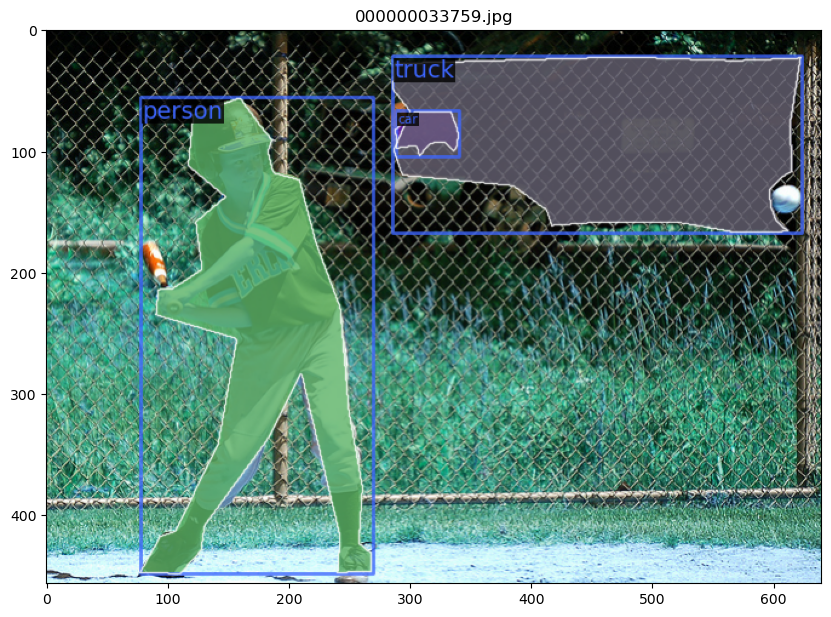

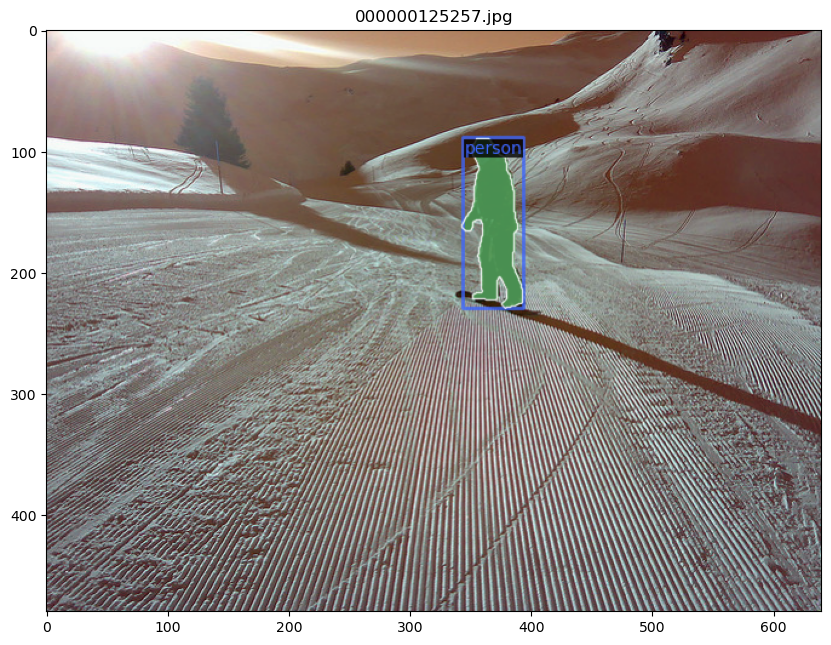

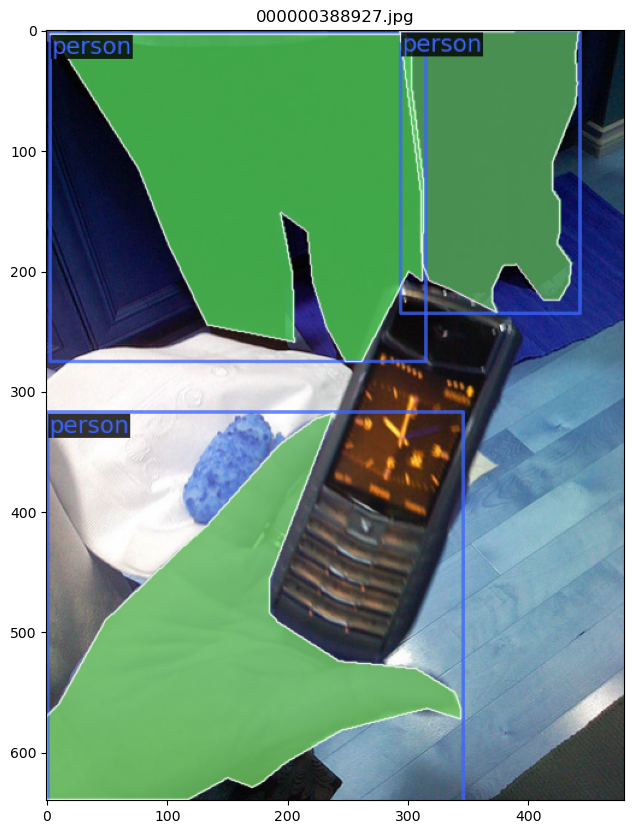

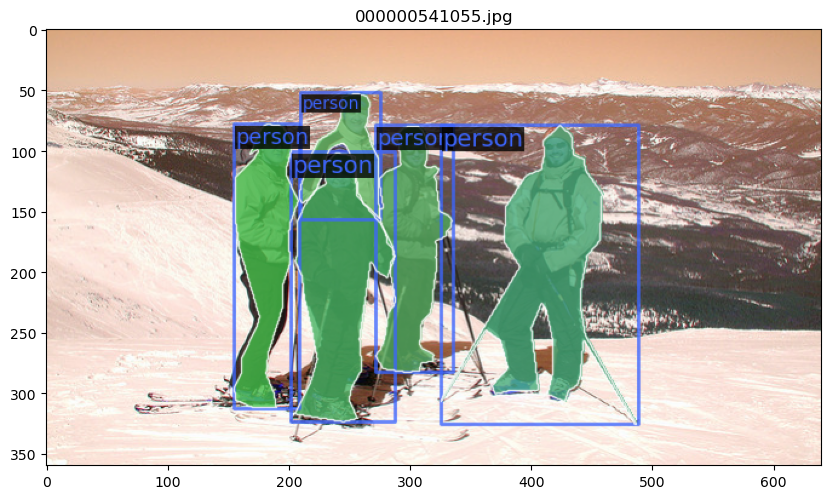

[None, None]

In [347]:
# preview data for train and valid dataset
preview_coco_file(train_coco, img_folder=osp.join(tmp_outputs.cache_data, "val2017"), count=2)
preview_coco_file(val_coco, img_folder=osp.join(tmp_outputs.cache_data, "val2017"), count=2)

In [343]:
import matplotlib.pyplot as plt

areas  = []
counts = []
categories = []
categories_annotation = []

anns = coco_annotation.get('annotations', [])
for image in coco_annotation.get('images', []):
    image_anns = [ann for ann in anns if ann['image_id'] == image['id']]
    counts.append(len(image_anns))
    
    for ann in image_anns:
        areas.append(ann.get('area'))
        categories.append(ann.get('category_id'))
    
    categories_annotation += coco_annotation['categories']
           
counts = np.array(counts)
areas  = np.array(areas)

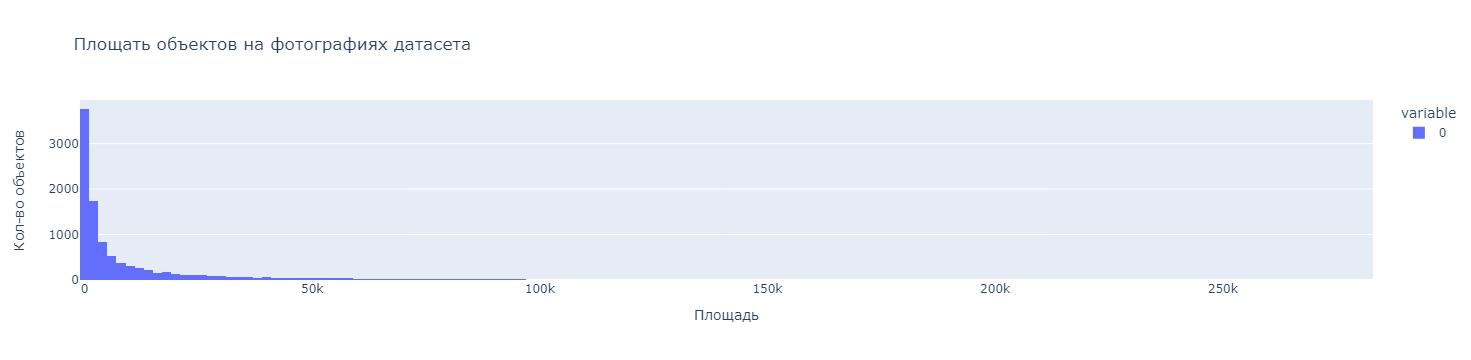

In [345]:
import plotly.express as px

fig = px.histogram(areas, title='Площать объектов на фотографиях датасета')
fig.layout.yaxis.title = 'Кол-во объектов'
fig.layout.xaxis.title = 'Площадь'
fig.show()

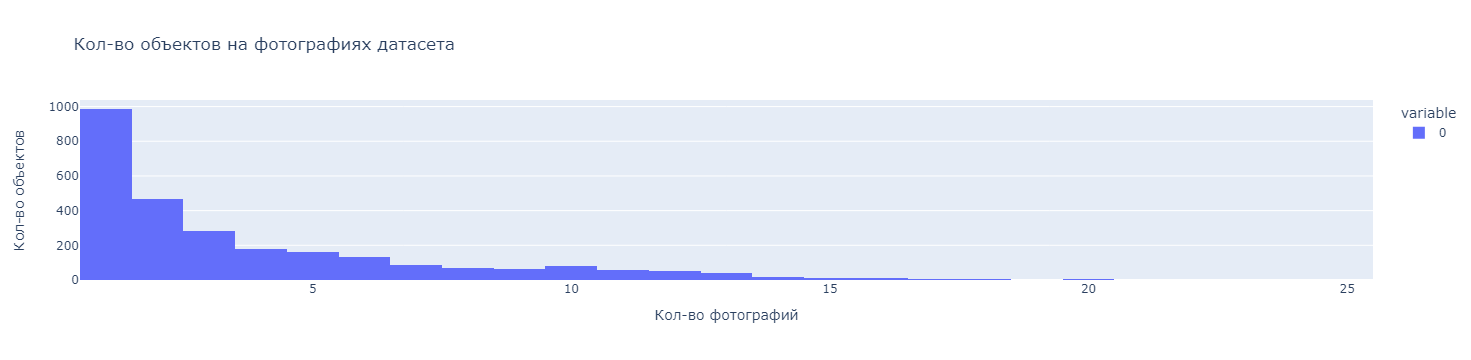

In [346]:
fig = px.histogram(counts, title='Кол-во объектов на фотографиях датасета')
fig.layout.yaxis.title = 'Кол-во объектов'
fig.layout.xaxis.title = 'Кол-во фотографий'
fig.show()

## Save train and validation datasets to parquet

In [356]:
import json
from pathlib import Path
from tqdm import tqdm
import pandas as pd


def build_pandas_df(_coco_data, img_folder:str = ""):
    pack = []
    for img_info in tqdm(_coco_data["images"]):
        row = {
            "file_names"       : None,
            "files_binary"     : None,
        }
        file_name = osp.join(img_folder, img_info["file_name"])
        with open(file_name, 'rb') as file_fd:
            row['files_binary'] = file_fd.read()
        row["file_names"] = img_info["file_name"]
        pack.append(row.copy())
    return pack

In [353]:
data_train_df =  build_pandas_df(train_coco, img_folder=osp.join(tmp_outputs.cache_data, "val2017"))
data_train_df = spark.createDataFrame(data_train_df)
data_train_df.printSchema()

data_val_df =  build_pandas_df(val_coco, img_folder=osp.join(tmp_outputs.cache_data, "val2017"))
data_val_df = spark.createDataFrame(data_val_df)
data_val_df.printSchema()

100%|██████████| 1824/1824 [00:00<00:00, 6714.05it/s]


root
 |-- file_names: string (nullable = true)
 |-- files_binary: binary (nullable = true)



100%|██████████| 899/899 [00:00<00:00, 6651.31it/s]


root
 |-- file_names: string (nullable = true)
 |-- files_binary: binary (nullable = true)



In [355]:
data_train_df.write.mode("overwrite").option("compression", "none").parquet(outputs.train_coco_data)
data_val_df.write.mode("overwrite").option("compression", "none").parquet(outputs.eval_coco_data)

23/10/12 21:24:17 WARN TaskSetManager: Stage 0 contains a task of very large size (72723 KiB). The maximum recommended task size is 1000 KiB.
23/10/12 21:24:32 WARN TaskSetManager: Stage 1 contains a task of very large size (34631 KiB). The maximum recommended task size is 1000 KiB.


In [358]:
# save train and valid annotations to json
os.makedirs(outputs.cache_config, exist_ok=True)
train_annotation_path = osp.join(outputs.cache_config, "train_coco_annotations.json")
val_annotation_path = osp.join(outputs.cache_config, "val_coco_annotations.json")

with open(train_annotation_path, 'w') as f:
    json.dump(train_coco, f, indent=4)

with open(val_annotation_path, 'w') as f:
    json.dump(val_coco, f, indent=4)

In [394]:
CONFIG = dict(**substep_params)
CONFIG["train_coco_annotation"] = "train_coco_annotations.json"
CONFIG["val_coco_annotation"] = "val_coco_annotations.json"
CONFIG["train_images"] = "train_coco_data"
CONFIG["val_images"] = "eval_coco_data"

config_path = osp.join(outputs.cache_config, "config.json")
with open(config_path, 'w') as f:
    json.dump(CONFIG, f, indent=4)

In [395]:
#9 stop spark
SinaraSpark.stop_session()